In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
censusdata=pd.read_csv('census-income.csv',skipinitialspace = True)
popdata = pd.read_csv('popdata.csv')

In [6]:
censusdata.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
popdata.head()

,value,date
0,127299.0,1952-01-01
1,127517.0,1952-02-01
2,127721.0,1952-03-01
3,127933.0,1952-04-01
4,128130.0,1952-05-01


In [8]:
popdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
 1   date    816 non-null    object 
dtypes: float64(1), object(1)
memory usage: 12.9+ KB


In [9]:
censusdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Unnamed: 14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
censusdata.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Unnamed: 14       0
dtype: int64

In [11]:
popdata.isnull().sum()

value    0
date     0
dtype: int64

# Data Preprocessing

In [12]:
censusdata.replace(to_replace = '?', value = np.nan , inplace = True)

In [13]:
censusdata.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Unnamed: 14          0
dtype: int64

In [14]:
censusdata = censusdata.dropna()

In [15]:
censusdata.shape

(30162, 15)

In [16]:
popdata.replace(to_replace = '?', value = np.nan , inplace = True)

In [17]:
popdata.isnull().sum()

value    0
date     0
dtype: int64

# Data Manipulation

In [18]:
census_ed = censusdata['education']
census_ed.head()

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: education, dtype: object

In [19]:
census_seq = censusdata.iloc[:,0:8]
census_seq.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife


In [20]:
census_col = censusdata.iloc[:,[5,8,11]]
census_col.head()

,marital-status,race,capital-loss
0,Never-married,White,0
1,Married-civ-spouse,White,0
2,Divorced,White,0
3,Married-civ-spouse,Black,0
4,Married-civ-spouse,Black,0


In [21]:
male_gov = censusdata[(censusdata['sex'] == 'Male') & (censusdata['workclass'] == 'State-gov')]
male_gov.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K


In [22]:
census_us = censusdata[(censusdata['age'] == 39) & ((censusdata['education'] == 'Bachelors') | (censusdata['native-country'] == 'United-States'))]
census_us.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
129,39,Private,365739,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
166,39,Federal-gov,235485,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,42,United-States,<=50K
320,39,Self-emp-not-inc,174308,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [23]:
census_200 = censusdata.sample(200)
census_200

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
8603,62,Local-gov,407669,7th-8th,4,Widowed,Other-service,Not-in-family,Black,Female,0,0,35,United-States,<=50K
32250,43,Private,409922,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,50,United-States,>50K
12704,41,Federal-gov,214838,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K
10262,39,Private,233428,HS-grad,9,Divorced,Exec-managerial,Other-relative,White,Female,0,0,40,United-States,<=50K
8406,65,Local-gov,125768,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18341,38,Private,76317,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,>50K
6998,18,Private,125441,11th,7,Never-married,Other-service,Own-child,White,Male,1055,0,20,United-States,<=50K
748,29,Private,267034,11th,7,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,Haiti,<=50K
27830,25,Private,50103,HS-grad,9,Never-married,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K


In [24]:
censusdata['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [25]:
censusdata.iloc[:,[1,10]].groupby(['workclass']).mean()

,capital-gain
workclass,
Federal-gov,832.321315
Local-gov,829.230285
Private,879.858207
Self-emp-inc,4810.746741
Self-emp-not-inc,1913.134454
State-gov,684.306489
Without-pay,487.857143


In [26]:
census_male = censusdata[(censusdata['sex'] == 'Male') & (censusdata['Unnamed: 14'] == '>50K')]
census_male.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


In [27]:
census_female = censusdata[(censusdata['sex'] == 'Female') & (censusdata['Unnamed: 14'] == '>50K')]
census_female.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
67,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K


In [28]:
a = censusdata[(censusdata['workclass'] == 'Private') & (censusdata['Unnamed: 14'] == '<=50K')]
percentage = (len(a.index)/len(censusdata.index))*100
print(percentage,'%')

57.72163649625356 %


In [29]:
b = censusdata[(censusdata['marital-status'] == 'Married-civ-spouse') | (censusdata['marital-status'] == 'Married-spouse-absent') | (censusdata['marital-status'] =='Married-AF-spouse')]
percentage = (len(b.index)/len(censusdata.index))*100
print(percentage,'%')

47.92785624295471 %


In [30]:
c = censusdata[(censusdata['education'] == 'HS-grad') & (censusdata['Unnamed: 14'] == '>50K')]
percentage = (len(c.index)/len(censusdata.index))*100
print(percentage,'%')

5.361050328227571 %


# Linear Regression

In [24]:
# here Independent variable : education-num
#      dependent variable : hours-per-week

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

x = censusdata['education-num']
y = censusdata['hours-per-week']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)
x_train = pd.DataFrame(x_train,columns=['education-num'])
y_train = pd.DataFrame(y_train,columns=['hours-per-week'])
x_test = pd.DataFrame(x_test,columns=['education-num'])

In [32]:
#trained on train set data
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

In [33]:
# with test set data
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred,columns=['Predicted'])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.632257802626869
Mean Squared Error: 145.81515723280097
Root Mean Squared Error: 12.075394702981802


In [34]:
# with train set data
y_pred = regressor.predict(x_train)
y_pred = pd.DataFrame(y_pred,columns=['Predicted'])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 7.459355547796268
Mean Squared Error: 137.76014309500732
Root Mean Squared Error: 11.737126696726389


# Logistic Regression

Simple logistic regression model 

In [38]:
censusdata['YearlyIncome'] = censusdata['Unnamed: 14']
censusdata['YearlyIncome']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: YearlyIncome, Length: 30162, dtype: object

In [51]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder
censusdata['YearlyIncome'] = L.fit_transform(censusdata['YearlyIncome'],censusdata['YearlyIncome'])
censusdata['occupation'] = L.fit_transform(censusdata['occupation'],censusdata['occupation'])

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

x = censusdata['occupation']
y = censusdata['YearlyIncome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.35,random_state = 0)


In [54]:
x_train_log= pd.DataFrame(x_train)
y_train_log = pd.DataFrame(y_train)
x_test_log = pd.DataFrame(x_test)
logmodel = LogisticRegression(solver='lbfgs') 
logmodel.fit(x_train_log, y_train_log)
y_pred_log = logmodel.predict(x_test_log)
confusion_matrix = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix)
print('Accuracy: %d', (logmodel.score(x_test_log, y_test)))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[7921    0]
 [2636    0]]
Accuracy: %d 0.750307852609643


Multiple logistic regression model 

In [100]:
censusdata['workclass'] = L.fit_transform(censusdata['workclass'],censusdata['workclass'])
censusdata['education'] = L.fit_transform(censusdata['education'],censusdata['education'])
x = pd.DataFrame(data = censusdata, columns = [ 'age','workclass','education'])
y = censusdata['YearlyIncome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [101]:
x_train_log= pd.DataFrame(x_train)
y_train_log = pd.DataFrame(y_train)
x_test_log = pd.DataFrame(x_test)
logmodel = LogisticRegression(solver='lbfgs') 
logmodel.fit(x_train_log, y_train_log)
y_pred_log = logmodel.predict(x_test_log)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix)
print('Accuracy: %d', (logmodel.score(x_test_log, y_test)))

[[4394  138]
 [1464   37]]
Accuracy: %d 0.7344604674291397


# Decision Tree

In [106]:
categorical_columns = [columns for columns in censusdata.columns if censusdata[columns].dtypes == 'O']
categorical_columns

['marital-status',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Unnamed: 14']

In [109]:
for i in categorical_columns:
    censusdata[i] = L.fit_transform(censusdata[i],censusdata[i])

In [110]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix

x = censusdata.iloc[:, :-1]
y = censusdata['YearlyIncome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [111]:
clf = tree.DecisionTreeClassifier() 
clf.fit(x_train,y_train) 
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
print(accuracy_score(y_test_pred,y_test))
confusion_matrix(y_test_pred,y_test)

1.0


array([[6764,    0],
       [   0, 2285]], dtype=int64)

# Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

x = censusdata.iloc[:, :-1]
y = censusdata['YearlyIncome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [115]:
classifier1=RandomForestClassifier(n_estimators=300)
classifier1.fit(x_train,y_train)
y_pred=classifier1.predict(x_test)

In [116]:
print(accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

1.0


array([[4532,    0],
       [   0, 1501]], dtype=int64)

# Time Series

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
popdata['date'] = pd.to_datetime(popdata['date'])
popdata.index = popdata['date']
print(popdata)

                 value       date
date                             
1952-01-01  127299.000 1952-01-01
1952-02-01  127517.000 1952-02-01
1952-03-01  127721.000 1952-03-01
1952-04-01  127933.000 1952-04-01
1952-05-01  128130.000 1952-05-01
...                ...        ...
2019-08-01  300581.333 2019-08-01
2019-09-01  300775.872 2019-09-01
2019-10-01  300972.035 2019-10-01
2019-11-01  301144.949 2019-11-01
2019-12-01  301299.946 2019-12-01

[816 rows x 2 columns]


In [119]:
del popdata['date']

In [120]:
popdata.head()

,value
date,
1952-01-01,127299.0
1952-02-01,127517.0
1952-03-01,127721.0
1952-04-01,127933.0
1952-05-01,128130.0


<AxesSubplot:xlabel='date'>

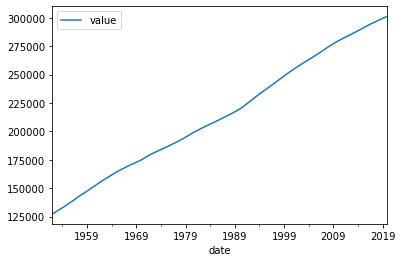

In [123]:
popdata.plot()

In [124]:
mean_log = popdata.rolling(window=12).mean()
std_log = popdata.rolling(window=12).std()
print(mean_log, std_log)

                    value
date                     
1952-01-01            NaN
1952-02-01            NaN
1952-03-01            NaN
1952-04-01            NaN
1952-05-01            NaN
...                   ...
2019-08-01  299675.645500
2019-09-01  299841.569167
2019-10-01  300007.492917
2019-11-01  300173.416667
2019-12-01  300339.340417

[816 rows x 1 columns]                  value
date                  
1952-01-01         NaN
1952-02-01         NaN
1952-03-01         NaN
1952-04-01         NaN
1952-05-01         NaN
...                ...
2019-08-01  565.252176
2019-09-01  572.166025
2019-10-01  588.374720
2019-11-01  606.239425
2019-12-01  620.412780

[816 rows x 1 columns]


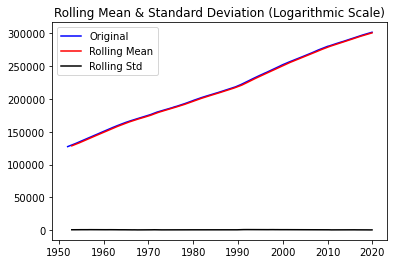

In [125]:
plt.plot(popdata, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')
plt.show()

In [126]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(popdata['value'])
print(result)

(-0.6653174109472528, 0.8555297779110393, 17, 798, {'1%': -3.4385711275998583, '5%': -2.8651686574447375, '10%': -2.568702230639255}, 6593.486797606457)


In [128]:
first_log = np.log(popdata)
first_log = first_log.dropna()

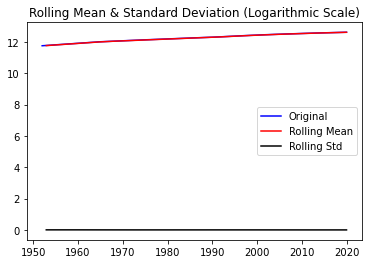

In [129]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')
plt.show()

In [130]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head() 

,value
date,
1952-12-01,0.009811
1953-01-01,0.009748
1953-02-01,0.009553
1953-03-01,0.009237
1953-04-01,0.009139


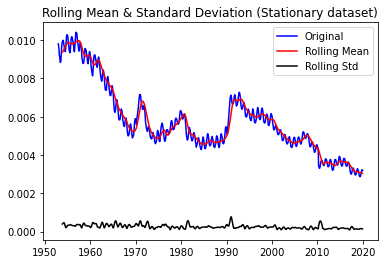

In [131]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Stationary dataset)')
plt.show()

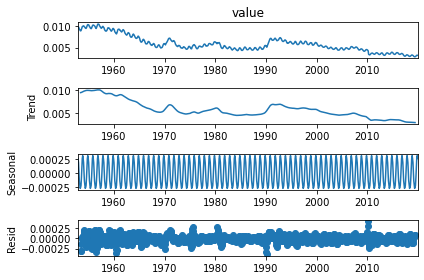

In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(new_data['value'])
decomposition.plot();

In [133]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

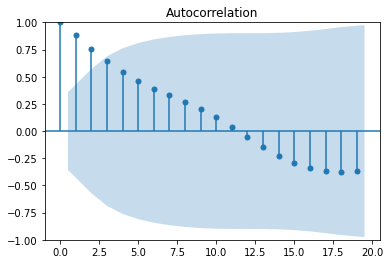

In [134]:
acf_plot=acf(new_data)
plot_acf(acf_plot,lags = 19 );

In [135]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

E:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


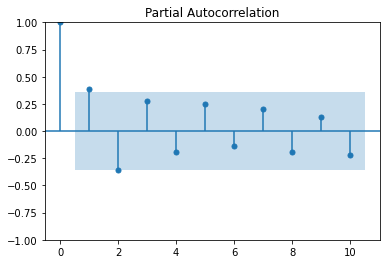

In [136]:
pacf_plot=pacf(new_data)
plot_pacf(pacf_plot, lags = 10);

In [138]:
new_data.shape

(805, 1)

In [139]:
train = new_data.iloc[:665]['value']
test = new_data.iloc[666:]['value']

In [160]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(2,0,1))
model_fit = model.fit()
model_fit.summary()

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  665
Model:                 ARIMA(2, 0, 1)   Log Likelihood                5215.334
Date:                Mon, 23 Jan 2023   AIC                         -10420.667
Time:                        13:55:23   BIC                         -10398.168
Sample:                    12-01-1952   HQIC                        -10411.950
                         - 04-01-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.001     11.464      0.000       0.005       0.007
ar.L1          1.5906      0.001   1303.171      0.000       1.588       1.593
ar.L2         -0.5979      0.001   -488.290      0.000      -0.600      -0.596
ma.L1          0.2902   2.62e-06   1.11e+05      0.000       0.290       0.290
sigma2      8.488e-09   3.54e-10     23.973      0.000    7.79e-09    9.18e-09
===================================================================================
Ljung-Box (L1) (Q):                   3.44   Jarque-Bera (JB):                79.32
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.82e+22. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='date'>

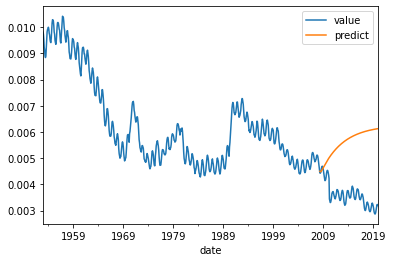

In [161]:
new_data['predict'] = model_fit.predict(start= len(train), end=len(train)+len(test)- 1, dynamic=True)
new_data[['value','predict']].plot()

In [162]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
model = SARIMAX(train, order=(2,0,1), seasonal_order=(2,0,1,12))
model = model.fit()

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='date'>

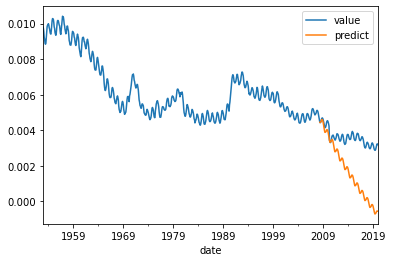

In [163]:
new_data['predict'] = model.predict(start= len(train) ,end=len(train)+len(test)- 1, dynamic=True)
new_data[['value','predict']].plot()

<AxesSubplot:xlabel='date'>

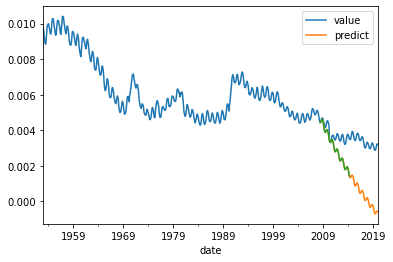

In [164]:
forecast = model.forecast(steps=72)
new_data.plot()
forecast.plot()